# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [1]:
import numpy as np   
import pandas as pd    
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt   
import matplotlib.style

### Importing data

In [2]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")  

C:\Users\Shikhar Shrivastava\AppData\Local\Temp\ipykernel_14832\1606136728.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB.csv")


### EDA

In [3]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [4]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [5]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [7]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [8]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [9]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [10]:
df.instant_bookable.astype("object")

0        False
1         True
2         True
3        False
4         True
         ...  
74106    False
74107    False
74108     True
74109     True
74110    False
Name: instant_bookable, Length: 74111, dtype: object

In [11]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'],drop_first=True)

In [12]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1


In [13]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
dtype: int64

### Imputing missing values

In [14]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()        

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [15]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1,1


In [16]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021,0.262458
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856,0.439973
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [17]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [18]:
print('Before',df.shape)
df.drop_duplicates(inplace=True) 
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

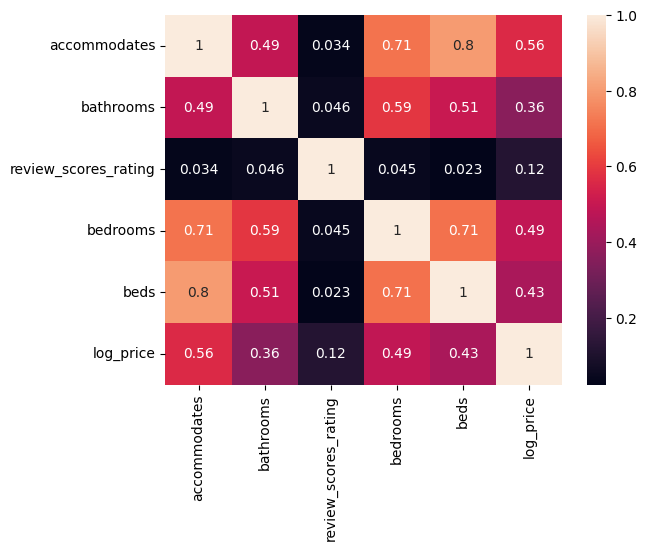

In [20]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [21]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   review_scores_rating          54113 non-null  float64
 3   bedrooms                      54113 non-null  float64
 4   beds                          54113 non-null  float64
 5   log_price                     54113 non-null  float64
 6   room_type_Private room        54113 non-null  uint8  
 7   room_type_Shared room         54113 non-null  uint8  
 8   cancellation_policy_moderate  54113 non-null  uint8  
 9   cancellation_policy_strict    54113 non-null  uint8  
 10  cleaning_fee_True             54113 non-null  uint8  
 11  instant_bookable_True         54113 non-null  uint8  
dtypes: float64(6), uint8(6)
memory usage: 3.2 MB


### Outlier Checks

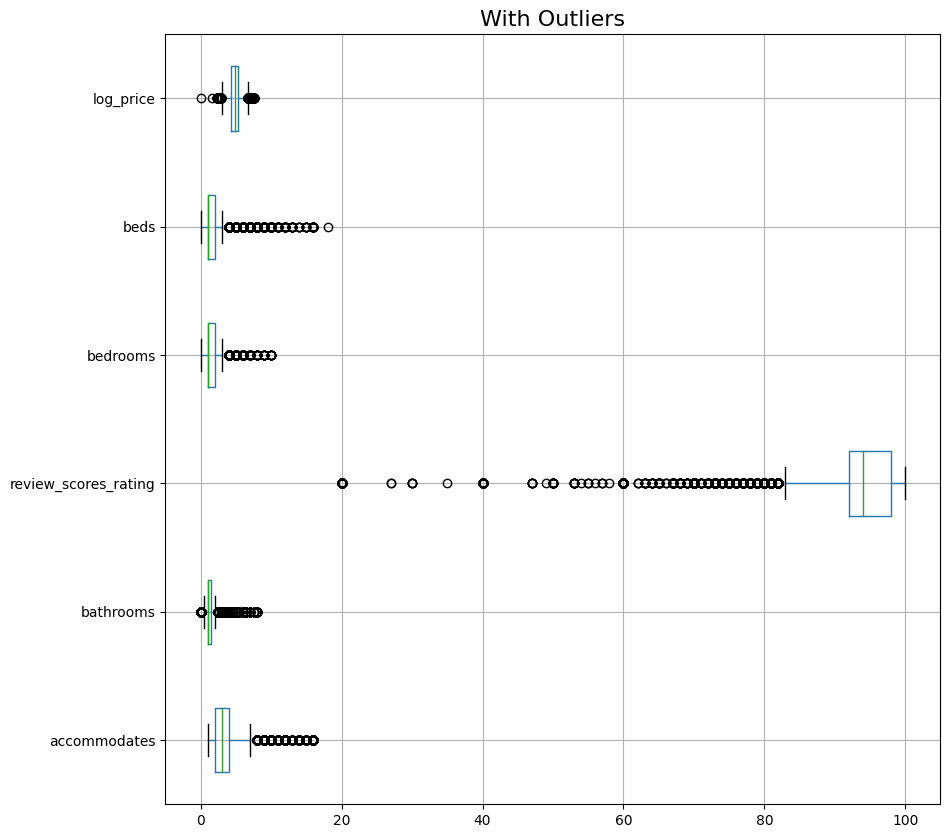

In [23]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [24]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [25]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

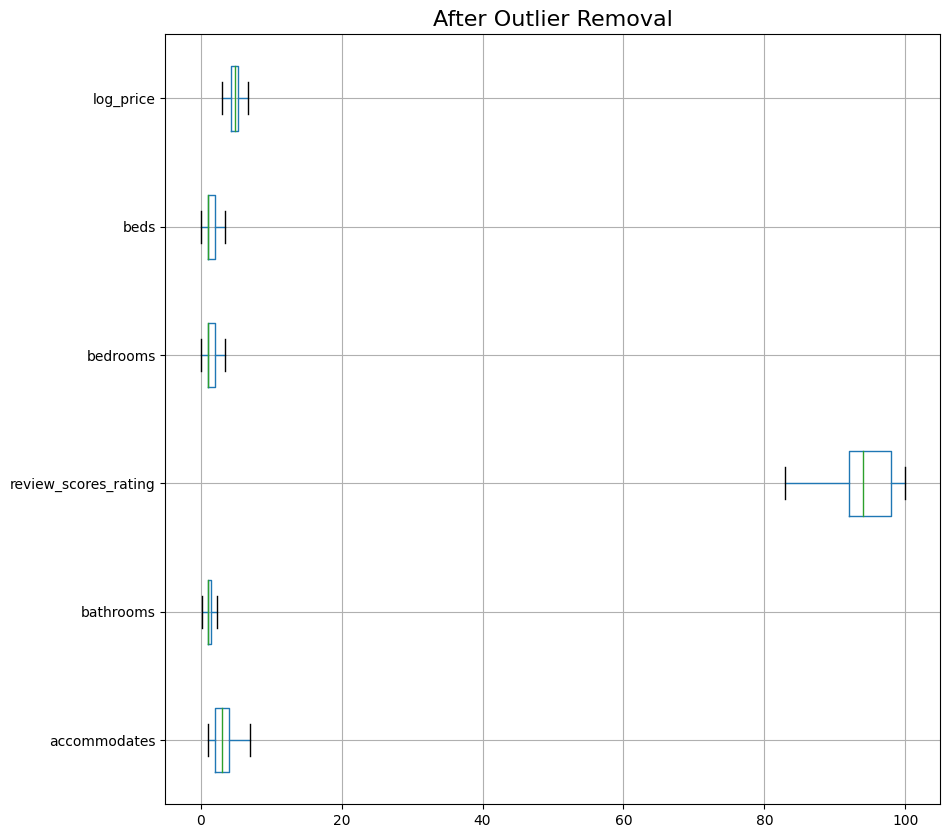

In [26]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

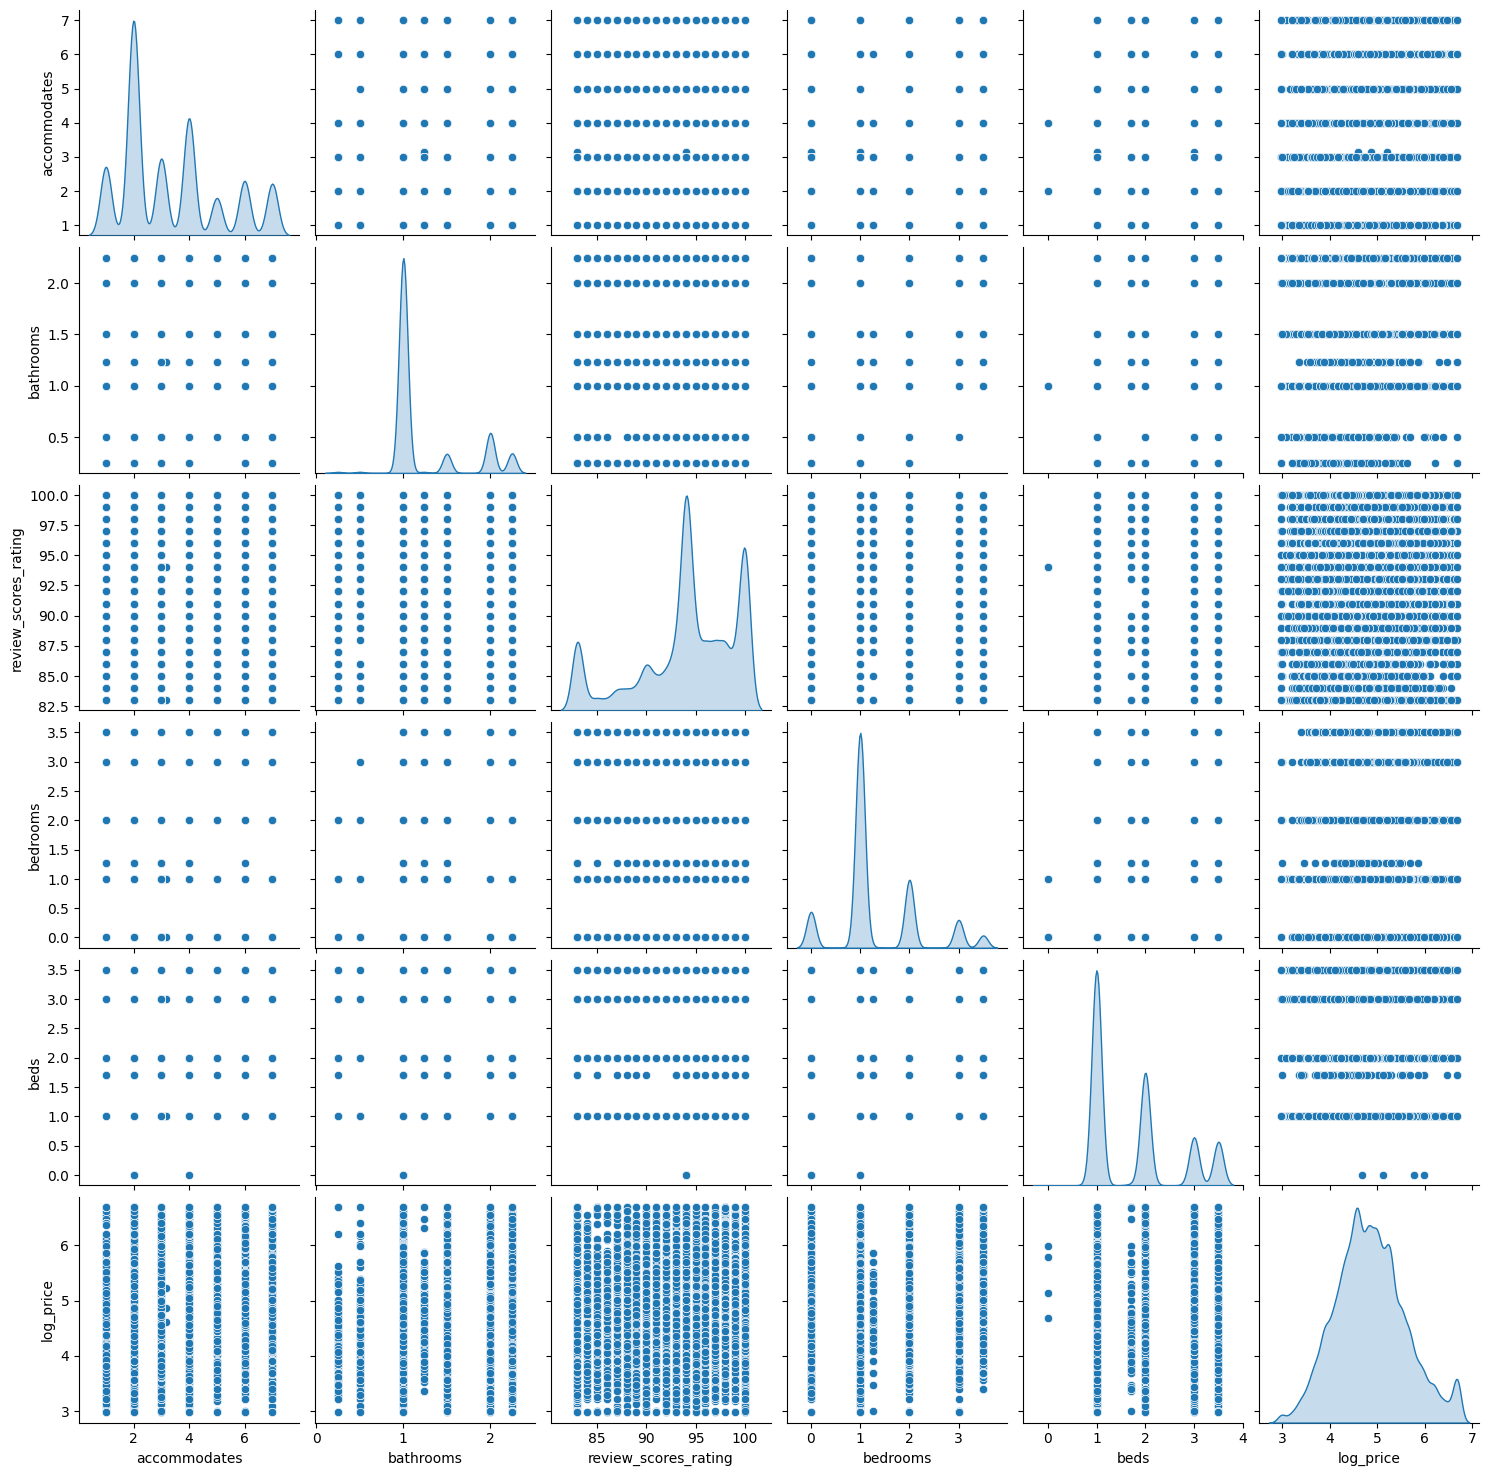

In [27]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')  
plt.show()

### Train-Test Split

In [28]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe. 
y = df[['log_price']]

In [29]:
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,0,0,0,0,1,0
4,2.0,1.0,83.000000,0.0,1.0,0,0,1,0,1,1


In [30]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression using statsmodel(OLS)

In [31]:
import statsmodels.api as sm

In [49]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [51]:
model = sm.OLS(y_train,X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:14:40   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [52]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                           387.863896
accommodates                      4.000584
bathrooms                         1.478131
review_scores_rating              1.016738
bedrooms                          2.491656
beds                              3.353111
room_type_Private room            1.464462
room_type_Shared room             1.108158
cancellation_policy_moderate      1.536242
cancellation_policy_strict        1.636879
cleaning_fee_True                 1.146757
instant_bookable_True             1.015171
dtype: float64



#### <i>AS few predictors have VIF values > 2 therefore there is some multicolinearity in the data </i>


<font color='red'><i>We remove those predictors with multicolinarity due to which there is least impact on the adjusted R2 </i></font>

In [55]:
X_train.columns

Index(['const', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [56]:
#1) Removing predictor 'accomodates' as VIF>2
X_train2 = X_train.drop(["accommodates"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.495 
Adjusted R-squared: 0.495


In [57]:
0.508-0.495
# Seems like an important predictor and thus wouldnot choose to drop it .

0.013000000000000012

In [58]:
#2) Removing predictor 'beds' as VIF>2
X_train3 = X_train.drop(["beds"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train3)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.507 
Adjusted R-squared: 0.507


In [59]:
0.508-0.507
# As very less effect on the adjusted R2 we can choose to drop it 

0.0010000000000000009

In [60]:
#2) Removing predictor 'bedrooms' as VIF>2 
X_train4 = X_train.drop(["bedrooms"], axis=1)
olsmod_3 = sm.OLS(y_train, X_train4)
olsres_3 = olsmod_3.fit()
print(
    "R-squared:",
    np.round(olsres_3.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_3.rsquared_adj, 3),
)

R-squared: 0.495 
Adjusted R-squared: 0.495


##### Dropping 'beds' from the training data 

In [62]:
X_train = X_train.drop(["beds"], axis=1)

In [63]:
olsmod_5 = sm.OLS(y_train, X_train)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4179.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:37:17   Log-Likelihood:                -30765.
No. Observations:               40584   AIC:                         6.155e+04
Df Residuals:                   40573   BIC:                         6.165e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [64]:
# let's check the VIF of the predictors after removing'beds'
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const                           387.413657
accommodates                      2.674296
bathrooms                         1.475832
review_scores_rating              1.016705
bedrooms                          2.295074
room_type_Private room            1.463234
room_type_Shared room             1.100969
cancellation_policy_moderate      1.536157
cancellation_policy_strict        1.635515
cleaning_fee_True                 1.146714
instant_bookable_True             1.014953
dtype: float64



### Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables.

In [68]:
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4179.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:43:43   Log-Likelihood:                -30765.
No. Observations:               40584   AIC:                         6.155e+04
Df Residuals:                   40573   BIC:                         6.165e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Now as observed from above the predictor 'cancellation_policy_strict' has p-value>0.05 we remove that and build the model 

In [76]:
X_train5 = X_train.drop(["cancellation_policy_strict"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train5)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4643.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        11:57:51   Log-Likelihood:                -30766.
No. Observations:               40584   AIC:                         6.155e+04
Df Residuals:                   40574   BIC:                         6.164e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

**After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply . This shows that these variables did not have much predictive power.**

### Testing the Assumptions of Linear Regression 

##### For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity 
2. Independence 
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

#### Linearity and Independence of predictors 

In [77]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_6.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_6.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,5.010635,5.144325,-0.133689
1,5.703782,5.459808,0.243974
2,5.857933,5.378872,0.479062
3,5.129899,4.415037,0.714862
4,4.564348,4.960216,-0.395868


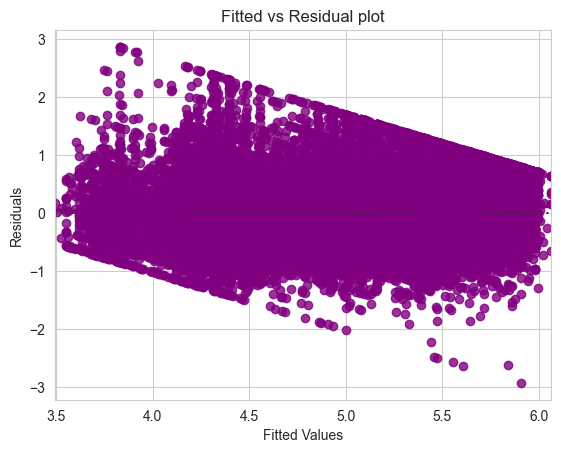

In [78]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

##### No pattern in the data thus the assumption of linearity and independence of predictors satisfied 

#### Test for Normality 

In [79]:
stats.shapiro(df_pred["Residuals"])

C:\Users\Shikhar Shrivastava\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9837239980697632, pvalue=0.0)

##### * Since p-value < 0.05, the residuals are not normal as per shapiro test.

#### Test for Homoscedasticity

In [83]:
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train5)[1]

0.4870827072978896

##### Since p-value > 0.05 we can say that the residuals are homoscedastic.

### The model built olsmod_6 satisfies all assumptions of Linear Regression 

In [82]:
olsres_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     4643.
Date:                Thu, 09 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:01:31   Log-Likelihood:                -30766.
No. Observations:               40584   AIC:                         6.155e+04
Df Residuals:                   40574   BIC:                         6.164e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.4095      0.050     67.828      0.000       3.311       3.508
accommodates                     0.0807      0.002     34.658      0.000       0.076       0.085
bathrooms                        0.1784      0.007     25.345      0.000       0.165       0.192
review_scores_rating             0.0118      0.001     22.372      0.000       0.011       0.013
bedrooms                         0.1465      0.005     31.644      0.000       0.137       0.156
room_type_Private room          -0.6098      0.007    -93.031      0.000      -0.623      -0.597
room_type_Shared room           -1.0919      0.015    -73.725      0.000      -1.121      -1.063
cancellation_policy_moderate    -0.0557      0.006     -9.486      0.000      -0.067      -0.044
cleaning_fee_True               -0.0841      0.006    -13.794      0.000      -0.096      -0.072
instant_bookable_True           -0.0657      0.006    -11.665      0.000      -0.077      -0.055
==============================================================================
Omnibus:                     2650.690   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4283.148
Skew:                           0.524   Prob(JB):                         0.00
Kurtosis:                       4.198   Cond. No.                     1.85e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### The model equation will be as follows:

In [86]:
# Let us write the equation of linear regression
Equation = "log_price ="
print(Equation, end=" ")
for i in range(len(X_train5.columns)):
    if i == 0:
        print(olsres_6.params[i], "+", end=" ")
    elif i != len(X_train5.columns) - 1:
        print(
            olsres_6.params[i],
            "* (",
            X_train5.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_6.params[i], "* (", X_train5.columns[i], ")")

log_price = 3.409465703282649 + 0.08069207090736776 * ( accommodates ) +  0.17839663484364524 * ( bathrooms ) +  0.01175278853136587 * ( review_scores_rating ) +  0.14648103383558453 * ( bedrooms ) +  -0.6097641801365734 * ( room_type_Private room ) +  -1.0918954019651275 * ( room_type_Shared room ) +  -0.05571142140066054 * ( cancellation_policy_moderate ) +  -0.08412976978082795 * ( cleaning_fee_True ) +  -0.0656783567764531 * ( instant_bookable_True )


### Observations 


- 1 unit increase in the no.of bathrooms lead to a 0.2 times increase in the log price 
- 1 unit increase in the no.of bedrooms lead to a 0.14 times increase in the log price 
- if instant booking available for a property it decreases the log ptice by a factor of 0.06
- if cleaning fee is charged for a property it decreases the log ptice by a factor of 0.08

### Predictions 

In [87]:
X_train5.columns

Index(['const', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cleaning_fee_True',
       'instant_bookable_True'],
      dtype='object')

In [89]:
X_test.columns

Index(['const', 'accommodates', 'bathrooms', 'review_scores_rating',
       'bedrooms', 'beds', 'room_type_Private room', 'room_type_Shared room',
       'cancellation_policy_moderate', 'cancellation_policy_strict',
       'cleaning_fee_True', 'instant_bookable_True'],
      dtype='object')

In [91]:
# dropping columns from the test data that are not there in the training data
X_test2 = X_test.drop(
    ['beds', 'cancellation_policy_strict'], axis=1
)

In [98]:
# let's make predictions on the test set
y_pred_test = olsres_6.predict(X_test2)
y_pred_train = olsres_6.predict(X_train5)

In [95]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [99]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

0.5164036750698142

In [100]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

0.52022702567226

### Linear Regression using (sklearn)

In [101]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train5, y_train)

LinearRegression()

In [103]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train5.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for accommodates is 0.08069207090736757
The coefficient for bathrooms is 0.17839663484364462
The coefficient for review_scores_rating is 0.011752788531366676
The coefficient for bedrooms is 0.14648103383558508
The coefficient for room_type_Private room is -0.6097641801365741
The coefficient for room_type_Shared room is -1.0918954019651275
The coefficient for cancellation_policy_moderate is -0.05571142140065956
The coefficient for cleaning_fee_True is -0.08412976978082776
The coefficient for instant_bookable_True is -0.06567835677645342


In [104]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.4094657032826454


In [105]:
# R square on training data
regression_model.score(X_train5, y_train)

0.5073800293325945

50% of the variation in the log_price is explained by the predictors in the model for train set

In [106]:
# R square on testing data
regression_model.score(X_test2, y_test)

0.5011325551678224

In [109]:
#RMSE on Training data

predicted_train=regression_model.fit(X_train5, y_train).predict(X_train5)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.5164036750698143

In [111]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train5, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5202270256722598